<a href="https://colab.research.google.com/github/avijit7074/price_prediction_gurgaon/blob/master/FEATURE_SELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('/content/gurgaon_properties_missing_value_imputated_final.csv')

In [3]:
df.shape

(3683, 18)

In [4]:
df.head()

,property_type,society,sector,price_in_cr,price_per_sq.ft,bedrooms,bathrooms,balconies,floorNum,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 3,0.45,5000.0,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
2,flat,tulsiani easy in homes,sector 35,0.40,6722.0,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df['agePossession'].unique()

array(['Relatively New', 'Old Property', 'New Property',
       'Under Construction', 'Moderately Old'], dtype=object)

In [6]:
train_df = df.drop(columns=['society','price_per_sq.ft'])

In [7]:
train_df.head()

,property_type,sector,price_in_cr,bedrooms,bathrooms,balconies,floorNum,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score
0,flat,sector 3,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
2,flat,sector 35,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train_df.to_csv('final_df', index=False)

**LUXURY_SCORE**

<Axes: >

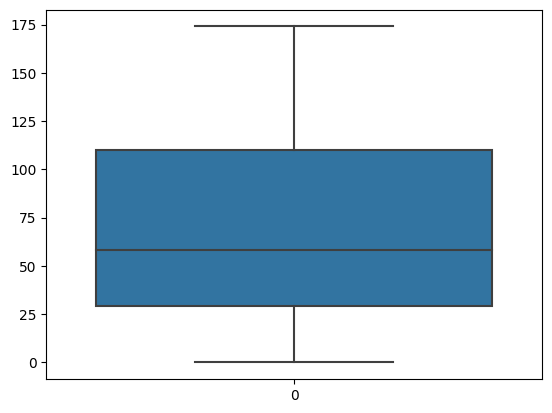

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
df['luxury_score'].describe()

count    3683.000000
mean       70.637252
std        53.406437
min         0.000000
25%        29.500000
50%        58.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

In [11]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [12]:

train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [13]:
train_df.head()

,property_type,sector,price_in_cr,bedrooms,bathrooms,balconies,floorNum,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 3,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,Low
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,Low
2,flat,sector 35,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,Low
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0,Medium
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


**FLOORNUM**

<Axes: >

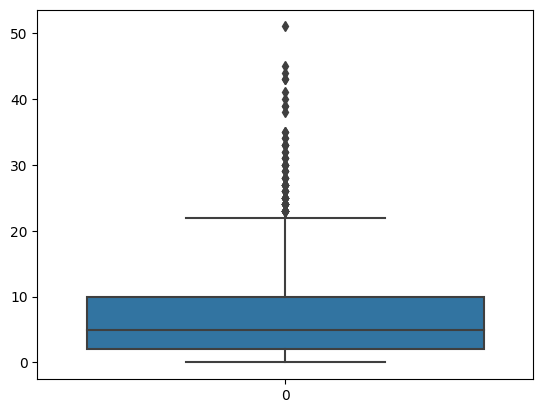

In [14]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)


In [17]:
train_df.head()

,property_type,sector,price_in_cr,bedrooms,bathrooms,balconies,floorNum,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 3,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,Low,Mid Floor
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,Low,Low Floor
2,flat,sector 35,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,Low,High Floor
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0,Medium,Low Floor
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor


In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)
train_df.head()

,property_type,sector,price_in_cr,bedrooms,bathrooms,balconies,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 3,0.45,2.0,2.0,1,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor
1,flat,sector 3,0.50,2.0,2.0,1,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Low Floor
2,flat,sector 35,0.40,2.0,2.0,3,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 61,1.47,2.0,2.0,2,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,Medium,Low Floor
4,flat,sector 92,0.70,2.0,2.0,3,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Floor


In [19]:
train_df.to_csv('model_for_web.csv',index=False)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price_in_cr', axis=1)
y_label = data_label_encoded['price_in_cr']

[array(['flat', 'house'], dtype=object)]
[array(['sector - 89', 'sector -72', 'sector 1', 'sector 10', 'sector 101',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 11', 'sector 110', 'sector 111', 'sector 112',
       'sector 113', 'sector 12', 'sector 13', 'sector 14', 'sector 15',
       'sector 17', 'sector 2', 'sector 21', 'sector 22', 'sector 23',
       'sector 24', 'sector 25', 'sector 26', 'sector 27', 'sector 28',
       'sector 29', 'sector 3', 'sector 30', 'sector 31', 'sector 32',
       'sector 33', 'sector 34', 'sector 35', 'sector 36', 'sector 37',
       'sector 38', 'sector 39', 'sector 4', 'sector 40', 'sector 41',
       'sector 42', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sector 53', 'sector 54', 'sector 55', 'sector 56',
       'sector 57', 'sector 58', 'sector 59', 'sec

In [21]:
X_label

,property_type,sector,bedrooms,bathrooms,balconies,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_category,floor_category
0,0.0,33.0,2.0,2.0,0.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,33.0,2.0,2.0,0.0,2.0,722.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,39.0,2.0,2.0,2.0,1.0,661.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,67.0,2.0,2.0,1.0,1.0,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,98.0,2.0,2.0,2.0,4.0,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,1.0,29.0,4.0,4.0,2.0,0.0,1800.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
3679,1.0,28.0,3.0,2.0,2.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3680,1.0,29.0,3.0,3.0,1.0,0.0,1350.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
3681,1.0,29.0,3.0,3.0,2.0,2.0,8829.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [22]:
y_label

0       0.45
1       0.50
2       0.40
3       1.47
4       0.70
        ... 
3678    5.50
3679    4.25
3680    4.50
3681    3.25
3682    3.60
Name: price_in_cr, Length: 3683, dtype: float64

**CORRELATION ANALYSIS**

<Axes: >

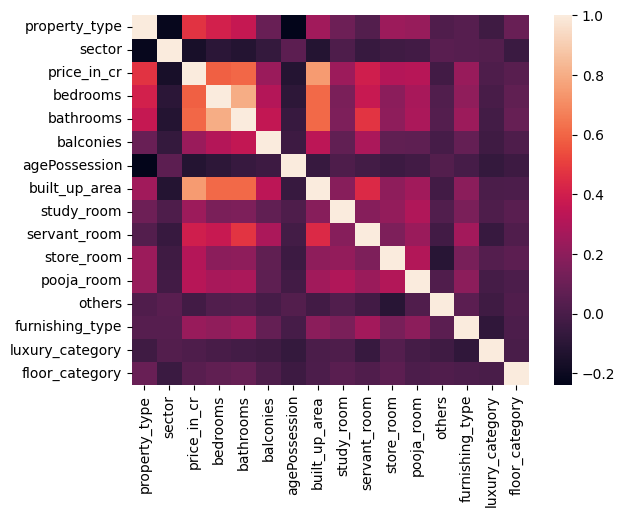

In [23]:
sns.heatmap(data_label_encoded.corr())

In [24]:
fi_df1 = data_label_encoded.corr()['price_in_cr'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1.sort_values('price_in_cr', ascending=False)

,feature,price_in_cr
1,price_in_cr,1.000000
6,built_up_area,0.747026
3,bathrooms,0.603820
2,bedrooms,0.587890
8,servant_room,0.396339
10,pooja_room,0.319809
9,store_room,0.311323
7,study_room,0.243435
4,balconies,0.239385
12,furnishing_type,0.234373


**RANDOMFOREST IMPORTANCE**

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.646850
0,property_type,0.105486
1,sector,0.096284
2,bedrooms,0.025712
3,bathrooms,0.024954
8,servant_room,0.021644
5,agePossession,0.016073
4,balconies,0.014874
12,furnishing_type,0.010129
9,store_room,0.009860


**GRADIENT BOOSTING FEATURE IMPORTANCE**

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.683548
1,sector,0.097433
0,property_type,0.096554
2,bedrooms,0.035935
3,bathrooms,0.033020
8,servant_room,0.024584
9,store_room,0.013346
5,agePossession,0.006819
12,furnishing_type,0.002485
4,balconies,0.001607


**PERMUTATION IMPORTANCE**

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.787739
0,property_type,0.207611
1,sector,0.167029
2,bedrooms,0.020938
8,servant_room,0.020459
3,bathrooms,0.014249
5,agePossession,0.003865
12,furnishing_type,0.003508
4,balconies,0.003454
9,store_room,0.002491


**LASSO**

In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.496310
0,property_type,0.667712
3,bathrooms,0.292706
9,store_room,0.206414
8,servant_room,0.155530
7,study_room,0.154604
12,furnishing_type,0.149003
10,pooja_room,0.061076
13,luxury_category,0.057240
2,bedrooms,0.025561


**RECURSIVE FEATURE ELIMINATON**

In [29]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.643117
1,sector,0.104048
0,property_type,0.103617
3,bathrooms,0.025632
2,bedrooms,0.025414
8,servant_room,0.019724
5,agePossession,0.015656
4,balconies,0.013734
12,furnishing_type,0.011325
9,store_room,0.008454


**LINEAR REGRESSION WEIGHTS**

In [30]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.498472
0,property_type,0.671479
3,bathrooms,0.296843
9,store_room,0.209518
8,servant_room,0.162322
7,study_room,0.161552
12,furnishing_type,0.156429
13,luxury_category,0.067136
10,pooja_room,0.062680
2,bedrooms,0.028160


**SHAP**

In [31]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.3 MB/s eta 0:00:00


In [32]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


array([[-1.93001157e-01,  2.49746868e-02, -5.88979491e-02, ...,
        -1.35885868e-02, -1.04050908e-02, -8.54553234e-04],
       [-1.97125124e-01,  6.10354660e-02, -5.51040279e-02, ...,
         2.26517995e-02, -6.75670857e-03, -1.19212210e-02],
       [-1.91668228e-01, -5.70993815e-03, -5.46762857e-02, ...,
        -1.42609470e-02, -6.73178773e-03,  2.34988516e-02],
       ...,
       [ 1.61717445e+00,  7.75818330e-01, -4.11865844e-02, ...,
        -1.75699813e-02,  2.47191166e-02,  1.36446668e-02],
       [ 5.36454318e-01,  1.71106687e-01, -7.67215115e-01, ...,
        -2.49000494e-02,  3.36077464e-02, -4.48512627e-02],
       [ 9.80325776e-01, -8.44470926e-01, -4.92584711e-02, ...,
         1.11999142e-01, -1.21872503e-03,  7.98931322e-03]])

In [33]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.244986
0,property_type,0.479471
1,sector,0.331348
3,bathrooms,0.105007
8,servant_room,0.104872
2,bedrooms,0.057039
12,furnishing_type,0.032942
4,balconies,0.030946
5,agePossession,0.025770
14,floor_category,0.023775


In [34]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')
final_fi_df

,price_in_cr,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.160954,0.096284,0.097433,0.167029,-0.058156,0.104048,-0.067305,0.331348
bedrooms,0.587890,0.025712,0.035935,0.020938,0.025561,0.025414,0.028160,0.057039
bathrooms,0.603820,0.024954,0.033020,0.014249,0.292706,0.025632,0.296843,0.105007
balconies,0.239385,0.014874,0.001607,0.003454,-0.098227,0.013734,-0.115373,0.030946
agePossession,-0.120112,0.016073,0.006819,0.003865,-0.033318,0.015656,-0.041199,0.025770
built_up_area,0.747026,0.646850,0.683548,0.787739,1.496310,0.643117,1.498472,1.244986
study_room,0.243435,0.005099,0.001586,-0.005243,0.154604,0.007525,0.161552,0.014316
servant_room,0.396339,0.021644,0.024584,0.020459,0.155530,0.019724,0.162322,0.104872
store_room,0.311323,0.009860,0.013346,0.002491,0.206414,0.008454,0.209518,0.019086


In [35]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [36]:
final_fi_df

,price_in_cr,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.046826,0.107638,0.107846,0.164186,-0.024379,0.116075,-0.028341,0.163637
bedrooms,0.171033,0.028744,0.039776,0.020582,0.010715,0.028351,0.011857,0.028169
bathrooms,0.175667,0.027896,0.036548,0.014007,0.122702,0.028595,0.124993,0.051858
balconies,0.069643,0.016628,0.001779,0.003395,-0.041176,0.015322,-0.048581,0.015283
agePossession,-0.034944,0.017969,0.007548,0.003799,-0.013967,0.017466,-0.017348,0.012727
built_up_area,0.217329,0.723130,0.756601,0.774330,0.627250,0.717457,0.630970,0.614838
study_room,0.070822,0.005700,0.001755,-0.005154,0.064810,0.008395,0.068026,0.007070
servant_room,0.115305,0.024196,0.027211,0.020111,0.065198,0.022004,0.068350,0.051791
store_room,0.090572,0.011023,0.014773,0.002448,0.086528,0.009431,0.088223,0.009425


In [37]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.717271
sector             0.131876
bathrooms          0.031781
bedrooms           0.029124
servant_room       0.029063
agePossession      0.011902
balconies          0.010481
store_room         0.009420
furnishing_type    0.009285
luxury_category    0.006215
floor_category     0.005004
study_room         0.003553
pooja_room         0.003177
others             0.001847
dtype: float64

In [38]:
X_label

,property_type,sector,bedrooms,bathrooms,balconies,agePossession,built_up_area,study_room,servant_room,store_room,pooja_room,others,furnishing_type,luxury_category,floor_category
0,0.0,33.0,2.0,2.0,0.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,33.0,2.0,2.0,0.0,2.0,722.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,39.0,2.0,2.0,2.0,1.0,661.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,67.0,2.0,2.0,1.0,1.0,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,98.0,2.0,2.0,2.0,4.0,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,1.0,29.0,4.0,4.0,2.0,0.0,1800.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
3679,1.0,28.0,3.0,2.0,2.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3680,1.0,29.0,3.0,3.0,1.0,0.0,1350.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
3681,1.0,29.0,3.0,3.0,2.0,2.0,8829.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [39]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [40]:
scores.mean()

0.7710539537015114

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja_room', 'study_room', 'others']), y_label, cv=5, scoring='r2')
scores.mean()

0.7696880521041563

In [42]:
export_df = X_label.drop(columns=['pooja_room', 'study_room', 'others'])
export_df['price'] = y_label

In [43]:
export_df.to_csv('gurgaon_properties_post_feature_selection_final.csv', index=False)
export_df

,property_type,sector,bedrooms,bathrooms,balconies,agePossession,built_up_area,servant_room,store_room,furnishing_type,luxury_category,floor_category,price
0,0.0,33.0,2.0,2.0,0.0,3.0,1000.0,0.0,0.0,0.0,1.0,2.0,0.45
1,0.0,33.0,2.0,2.0,0.0,2.0,722.0,0.0,0.0,1.0,1.0,1.0,0.50
2,0.0,39.0,2.0,2.0,2.0,1.0,661.0,0.0,0.0,0.0,1.0,0.0,0.40
3,0.0,67.0,2.0,2.0,1.0,1.0,1333.0,0.0,0.0,0.0,2.0,1.0,1.47
4,0.0,98.0,2.0,2.0,2.0,4.0,1217.0,0.0,0.0,0.0,1.0,2.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,1.0,29.0,4.0,4.0,2.0,0.0,1800.0,1.0,0.0,0.0,2.0,1.0,5.50
3679,1.0,28.0,3.0,2.0,2.0,2.0,1350.0,0.0,0.0,0.0,1.0,1.0,4.25
3680,1.0,29.0,3.0,3.0,1.0,0.0,1350.0,1.0,0.0,0.0,2.0,1.0,4.50
3681,1.0,29.0,3.0,3.0,2.0,2.0,8829.0,0.0,0.0,0.0,2.0,1.0,3.25
